# Extract Dominant Color, Color Palette, and File Name of the Impressionism Painting Image Files

In [ ]:
!pip install colorthief webcolors

In [ ]:
from colorthief import ColorThief

# Initialize empty lists to store data
dominant_color_list = []     # To store dominant colors
color_palette_list = []      # To store color palettes
file_name = []               # To store file names

number = 3600 # Though there are only 3,396 images after preprocessing, the index numbers of the files still range from 0 to 3599

# Loop through image indices from 0 to number - 1
for i in range(number):
    try:
        # Construct the image path using the index
        image_path = f"C:/art/impressionism/ip_{i}.jpg"

        # Create a ColorThief instance for the current image
        color_thief = ColorThief(image_path)

        # Get the dominant color of the image and append it to dominant_color_list
        dominant_color = color_thief.get_color()
        dominant_color_list.append(dominant_color)
       
        # Get the color palette of the image and append it to color_palette_list
        color_palette = color_thief.get_palette(color_count=6)
        color_palette_list.append(color_palette)
    
        # Append the file name (format: 'ip_0', 'sr_1', ...) to file_name list
        file_name.append('ip_' + f'{i}')

    except:
        pass

## Saving the Lists & file_name

In [4]:
import pickle

file = open("c:/data/dominant_color_list.txt", "wb")
pickle.dump(dominant_color_list, file)  
file.close() 

file = open("c:/data/color_palette_list.txt", "wb")
pickle.dump(color_palette_list, file)  
file.close() 

file = open("c:/data/file_name.txt", "wb")
pickle.dump(file_name, file)  
file.close()  

## Loading the Lists & file_name

In [33]:
import pickle

file = open("c:/data/dominant_color_list.txt", "rb")
dominant_color_list = pickle.load(file)  
file.close()  

file = open("c:/data/color_palette_list.txt", "rb")
color_palette_list = pickle.load(file)  
file.close()  

file = open("c:/data/file_name.txt", "rb")
file_name = pickle.load(file)  
file.close()  

## Create a Dataframe with the Extracted Information

In [97]:
import pandas as pd

# Create a DataFrame using the collected data
data = pd.DataFrame({
    'file_name': file_name,
    'colortf_dominant': dominant_color_list,
    'colortf_palette': color_palette_list
})

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   file_name         3396 non-null   object
 1   colortf_dominant  3396 non-null   object
 2   colortf_palette   3396 non-null   object
dtypes: object(3)
memory usage: 79.7+ KB


- Again, there are 3,396 images after preprocessing 3,600 images

In [99]:
data.to_csv('c:/data/ip_rgb_data.csv', index=False)

In [100]:
data = pd.read_csv('c:/data/ip_rgb_data.csv')

<br>

# Finding the Nearest Webcolor for the Dominant Color Using RGB Value & Euclidean Distance

In [15]:
import pandas as pd
import webcolors
from tqdm import tqdm
import os

# Read the data from a CSV file into a DataFrame
data = pd.read_csv('c:/data/ip_rgb_data.csv')

# Define a function to determine the closest color name from CSS3 colors for a given RGB tuple.
def closest_color(rgb):
    # Initialize a dictionary to store the Euclidean distance between the provided RGB value and each CSS3 color.
    differences = {}

    # Iterate through all CSS3 HEX colors and their respective names.
    for color_hex, color_name in webcolors.CSS3_HEX_TO_NAMES.items(): 
        # Convert the HEX color to an RGB tuple.
        r, g, b = webcolors.hex_to_rgb(color_hex)
        
        # Calculate the squared Euclidean distance between the RGB tuple and each CSS3 color.
        differences[sum([(r - rgb[0]) ** 2, 
                         (g - rgb[1]) ** 2,
                         (b - rgb[2]) ** 2])] = color_name 

    # Return the name of the color with the shortest distance to the given RGB tuple.
    return differences[min(differences.keys())] 

# Create an empty list to hold the names of the closest colors.
closest_colors = []

# Loop through each RGB tuple in the 'colortf_dominant' column of the data.
for color_tuple in tqdm(data['colortf_dominant']):
    # Extract the R, G, and B values from the string representation of the tuple.
    color = (int(color_tuple.strip('()').split(',')[0]), 
             int(color_tuple.strip('()').split(',')[1]),
             int(color_tuple.strip('()').split(',')[2]))

    # Try to get the exact CSS3 color name for the RGB tuple.
    try:
        cname = webcolors.rgb_to_name(color)
    # If the color isn't a perfect match to any CSS3 color, find the closest color name.
    except ValueError:
        cname = closest_color(color)

    # Add the color name to the list.
    closest_colors.append(cname)

# Add a new column 'closest_color' to the DataFrame that contains the names of the closest colors.
data['closest_color'] = closest_colors

100%|████████████████████████████████████████████████████████████████████████████| 3396/3396 [00:01<00:00, 3126.24it/s]


**Note** : 

- In Euclidean distance, a smaller value signifies greater similarity
- Conversely, in cosine similarity, a value closer to one indicates higher similarity

In [102]:
data.to_csv('c:/data/ip_rgb_data_with_closest_color.csv',index=False)

In [103]:
data = pd.read_csv('c:/data/ip_rgb_data_with_closest_color.csv')

In [16]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   file_name         3396 non-null   object
 1   colortf_dominant  3396 non-null   object
 2   colortf_palette   3396 non-null   object
 3   closest_color     3396 non-null   object
dtypes: object(4)
memory usage: 106.2+ KB


In [105]:
data.head()

file_name colortf_dominant  \
0      ip_1     (79, 86, 97)   
1      ip_2     (76, 84, 59)   
2      ip_3   (136, 102, 72)   
3      ip_4     (44, 21, 23)   
4      ip_5  (212, 201, 202)   

                                     colortf_palette   closest_color  
0  [(91, 108, 128), (227, 212, 196), (167, 149, 1...         dimgray  
1  [(68, 74, 50), (205, 172, 94), (159, 144, 90),...  darkolivegreen  
2  [(136, 102, 72), (61, 49, 20), (234, 199, 140)...          sienna  
3  [(44, 21, 23), (210, 137, 79), (114, 54, 44), ...           black  
4  [(214, 203, 204), (73, 69, 72), (137, 126, 128...       lightgray

<br>

# Grouping 138 colors into 41 color groups based on color frequency and similarity

- using that english has [11 basic color terms](https://en.wikipedia.org/wiki/Color_term#:~:text=English%20has%2011%20basic%20color,of%20these%20basic%20color%20terms.) & with the help of this [website](https://www.w3schools.com/colors/colors_groups.asp) below color groups were created 

In [107]:
basic_color_groups = {
    'Black': ['black'],
    'Pink': ['pink', 'lightpink', 'palevioletred', 'hotpink', 'deeppink'],
    'Gray': ['gray', 'dimgray', 'lightslategray', 'darkgray', 'slategray', 'lightgray', 'gainsboro', 'whitesmoke', 'silver'],
    'Red': ['lightcoral','red', 'darkred', 'firebrick', 'crimson', 'indianred', 'maroon', 'rosybrown'],
    'Brown': ['burlywood','tan','brown', 'saddlebrown', 'sienna', 'peru', 'chocolate', 'darkgoldenrod'],
    'Orange': ['bisque','sandybrown','orange', 'darkorange', 'coral', 'orangered', 'tomato', 'salmon', 'darksalmon', 'lightsalmon', 'peachpuff'],
    'Green': ['aquamarine','lightseagreen','mediumaquamarine','darkseagreen','darkkhaki','green', 'darkgreen', 'forestgreen', 'seagreen', 'olive', 'olivedrab', 'mediumseagreen', 'darkolivegreen', 'yellowgreen', 'lawngreen', 'chartreuse', 'lime', 'limegreen', 'palegreen', 'lightgreen', 'greenyellow', 'springgreen', 'mediumspringgreen'],
    'Yellow': ['cornsilk','navajowhite','blanchedalmond','goldenrod','wheat','yellow', 'gold', 'lightgoldenrodyellow', 'lemonchiffon', 'papayawhip', 'moccasin', 'peachpuff', 'palegoldenrod', 'khaki', 'lightyellow', 'ivory', 'beige'],
    'Blue': ['paleturquoise','darkturquoise','turquoise','darkcyan','cadetblue','teal','blue', 'mediumblue', 'royalblue', 'midnightblue', 'navy', 'darkblue', 'mediumslateblue', 'slateblue', 'darkslateblue', 'cornflowerblue', 'mediumturquoise', 'steelblue', 'lightskyblue', 'deepskyblue', 'dodgerblue', 'lightblue', 'skyblue', 'lightsteelblue', 'powderblue', 'teal', 'cadetblue', 'darkcyan'],
    'Purple': ['thistle','purple', 'darkmagenta', 'mediumorchid', 'darkviolet', 'darkorchid', 'blueviolet', 'indigo', 'mediumpurple', 'slateblue', 'darkslategray', 'darkslategray', 'darkorchid', 'purple', 'blueviolet', 'mediumorchid', 'slateblue', 'purple', 'darkorchid', 'mediumpurple', 'darkorchid', 'mediumvioletred', 'plum', 'palevioletred', 'darkslategray', 'darkslategray', 'darkorchid', 'darkslategray', 'darkorchid', 'darkslategray', 'darkslategray'],
    'White': ['white', 'snow', 'ghostwhite', 'whitesmoke', 'seashell', 'linen', 'beige', 'oldlace', 'antiquewhite', 'ivory', 'floralwhite', 'honeydew', 'mintcream', 'azure', 'aliceblue', 'lavender', 'lavenderblush', 'mistyrose'],
}

<br>

In [108]:
# Creating a lookup dictionary to map each color to its respective group
# For each group in `basic_color_groups`, each color within that group is associated with the group name
# This will make it easier to lookup the group name using a color
lookup = {color: group for group, colors in basic_color_groups.items() for color in colors}

# Using the `map` function of pandas DataFrame to create a new column `basic_color_group` in the `data` DataFrame
# This column will store the group name for each color in the `closest_color` column by looking it up in the `lookup` dictionary
data['basic_color_group'] = data['closest_color'].map(lookup)

In [109]:
data.head()

file_name colortf_dominant  \
0      ip_1     (79, 86, 97)   
1      ip_2     (76, 84, 59)   
2      ip_3   (136, 102, 72)   
3      ip_4     (44, 21, 23)   
4      ip_5  (212, 201, 202)   

                                     colortf_palette   closest_color  \
0  [(91, 108, 128), (227, 212, 196), (167, 149, 1...         dimgray   
1  [(68, 74, 50), (205, 172, 94), (159, 144, 90),...  darkolivegreen   
2  [(136, 102, 72), (61, 49, 20), (234, 199, 140)...          sienna   
3  [(44, 21, 23), (210, 137, 79), (114, 54, 44), ...           black   
4  [(214, 203, 204), (73, 69, 72), (137, 126, 128...       lightgray   

  basic_color_group  
0              Gray  
1             Green  
2             Brown  
3             Black  
4              Gray

In [110]:
data.basic_color_group.value_counts()

Gray      1424
Purple     621
Green      510
Brown      410
Red        236
Black      124
Blue        30
Yellow      21
Orange      11
White        8
Pink         1
Name: basic_color_group, dtype: int64

In [111]:
green = data[data['basic_color_group']=='Green']['closest_color']

In [112]:
green.value_counts()

darkolivegreen      384
darkkhaki            84
olivedrab            23
darkseagreen         15
olive                 1
yellowgreen           1
mediumaquamarine      1
seagreen              1
Name: closest_color, dtype: int64

- Given the prevalence of darkolivegreen, darkkhaki, olivedrab, and darkseagreen, we've established four distinct green color groups (Green_1, Green_2, Green_3, Green_4), each anchored by one of these foundational shades

Hence,
- darkolivegreen is the foundational color for Green_1 
- darkkhaki is the foundational color for Green_2 
- darkseagreen is the foundational color for Green_3 
- olivedrab is the foundational color for Green_4 

<br>

- Create a function to get rgb

In [12]:
import webcolors

def get_rgb(color_name):
    """
    Returns the RGB values for a given color name.
    
    Parameters:
    - color_name (str): Name of the color to convert to RGB.
    
    Returns:
    - tuple: An (r, g, b) tuple representing the RGB values of the color.
    - str: Returns 'Invalid color name' if the given color name is not recognized.
    """
    
    # Try to convert the color name to its RGB values
    try:
        r, g, b = webcolors.name_to_rgb(color_name)
        return (r, g, b)
    # If the color name is not recognized, raise a ValueError
    except ValueError:
        return "Invalid color name"

In [13]:
# Fetch the RGB values for some specific color names
darkolivegreen_rgb = get_rgb('darkolivegreen')
darkkhaki_rgb = get_rgb('darkkhaki')
olivedrab_rgb = get_rgb('olivedrab')
darkseagreen_rgb = get_rgb('darkseagreen')

# Create a dictionary of colors for which we want to find the most similar color
colors = {
    'seagreen': get_rgb('seagreen'),
    'yellowgreen': get_rgb('yellowgreen'),
    'mediumaquamarine': get_rgb('mediumaquamarine'),
    'olive': get_rgb('olive')
}

# Define a function to calculate the Euclidean distance between two RGB colors
def euclidean_distance(color1, color2):
    r1, g1, b1 = color1
    r2, g2, b2 = color2
    return ((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2) ** 0.5

# Create an empty dictionary to store the most similar color for each color in 'colors'
most_similar_groups = {}

# For each color in the 'colors' dictionary
for color_name, color_rgb in colors.items():
    # Calculate the Euclidean distance to the predefined colors
    distances = {
        'darkolivegreen': euclidean_distance(color_rgb, darkolivegreen_rgb),
        'darkkhaki': euclidean_distance(color_rgb, darkkhaki_rgb),
        'olivedrab': euclidean_distance(color_rgb, olivedrab_rgb),
        'darkseagreen': euclidean_distance(color_rgb, darkseagreen_rgb),
    }
    # Determine which of the predefined colors is the closest (most similar)
    most_similar_group = min(distances, key=distances.get)
    # Update the dictionary with the most similar color for the current color
    most_similar_groups[color_name] = most_similar_group

# Print the results
for color_name, similar_group in most_similar_groups.items():
    print(f"{color_name} is most similar to {similar_group}")

seagreen is most similar to darkolivegreen
yellowgreen is most similar to darkkhaki
mediumaquamarine is most similar to darkseagreen
olive is most similar to olivedrab


Based on the above results, we categorized the remaining shades within the Green Basic Color Group, aligning each with its closest foundational color. The four refined Green color categories are as follows :

- Green_1 : 'darkolivegreen', 'seagreen '           
- Green_2 : 'darkkhaki', 'yellowgreen'    
- Green_3 : 'darkseagreen', 'mediumaquamarine '
- Green_4 : 'olivedrab', 'olive'     

- The full list of 41 Color Groups are as below, the full list was created using all the images from 15 painting styles 

In [17]:
final_groups = {
    'Pink' : ['pink', 'lightpink', 'palevioletred', 'hotpink', 'deeppink'],
    'Orange_1' : ['orangered', 'orange'],
    'Orange_2' : ['bisque', 'peachpuff'],
    'Orange_3' : ['sandybrown', 'darksalmon', 'coral', 'tomato', 'salmon', 'lightsalmon'],
    'White_1' : ['linen','snow','seashell','honeydew','oldlace'],
    'White_2' : ['antiquewhite', 'mistyrose'],
    'White_3' : ['lavender', 'ghostwhite'],
    'Blue_1' : ['darkslateblue'],
    'Blue_2' : ['lightsteelblue', 'skyblue', 'powderblue', 'lightskyblue','paleturquoise', 'lightblue'],
    'Blue_3' : ['steelblue', 'royalblue', 'cornflowerblue', 'teal', 'slateblue', 'darkcyan', 'dodgerblue', 'darkturquoise'],
    'Blue_4' : ['midnightblue', 'navy', 'mediumblue'],
    'Blue_5' : ['cadetblue', 'mediumturquoise', 'turquoise'],
    'Yellow_1' : ['wheat', 'navajowhite', 'moccasin'],            
    'Yellow_2' : ['goldenrod', 'gold'], 
    'Yellow_3' : ['palegoldenrod'],        
    'Yellow_4' : ['beige', 'blanchedalmond', 'lemonchiffon', 'lightgoldenrodyellow', 'cornsilk', 'papayawhip'],
    'Yellow_5' : ['khaki'],
    "Red_1" : ['rosybrown', 'lightcoral'],            
    "Red_2" : ['indianred', 'crimson' ],  
    "Red_3" : ['maroon', 'firebrick','red'],
    "Black" : ["black" ],
    'Green_1' : ['darkolivegreen','seagreen','darkgreen','forestgreen'],
    'Green_2' : ['darkkhaki','yellowgreen','greenyellow'],
    'Green_3' : ['darkseagreen','mediumaquamarine','lightseagreen','mediumseagreen','aquamarine'],
    'Green_4' : ['olivedrab','olive'],
    'Brown_1' : ['tan'],
    'Brown_2' : ['sienna','brown'],
    'Brown_3' : ['peru','chocolate','darkgoldenrod'],
    'Brown_4' : ['saddlebrown'],
    'Brown_5' : ['burlywood'],
    'Purple_1' : ['darkslategray'],
    'Purple_2' : ['thistle', 'mediumpurple', 'plum'],
    'Gray_1' : ['dimgray'],
    'Gray_2' : ['silver'],
    'Gray_3' : ['gray'],
    'Gray_4' : ['darkgray'],
    'Gray_5' : ['lightgray'],
    'Gray_6' : ['gainsboro'],
    'Gray_7' : ['lightslategray'], 
    'Gray_8' : ['slategray'],
    'Gray_9' : ['whitesmoke']
}

In [116]:
lookup = {color: group for group, colors in final_groups.items() for color in colors}

data['final_group'] = data['closest_color'].map(lookup)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3396 entries, 0 to 3395
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   file_name          3396 non-null   object
 1   colortf_dominant   3396 non-null   object
 2   colortf_palette    3396 non-null   object
 3   closest_color      3396 non-null   object
 4   basic_color_group  3396 non-null   object
 5   final_group        3396 non-null   object
dtypes: object(6)
memory usage: 159.3+ KB


In [118]:
data.head()

file_name colortf_dominant  \
0      ip_1     (79, 86, 97)   
1      ip_2     (76, 84, 59)   
2      ip_3   (136, 102, 72)   
3      ip_4     (44, 21, 23)   
4      ip_5  (212, 201, 202)   

                                     colortf_palette   closest_color  \
0  [(91, 108, 128), (227, 212, 196), (167, 149, 1...         dimgray   
1  [(68, 74, 50), (205, 172, 94), (159, 144, 90),...  darkolivegreen   
2  [(136, 102, 72), (61, 49, 20), (234, 199, 140)...          sienna   
3  [(44, 21, 23), (210, 137, 79), (114, 54, 44), ...           black   
4  [(214, 203, 204), (73, 69, 72), (137, 126, 128...       lightgray   

  basic_color_group final_group  
0              Gray      Gray_1  
1             Green     Green_1  
2             Brown     Brown_2  
3             Black       Black  
4              Gray      Gray_5

In [120]:
data.to_csv('c:/data/ip_rgb_data_final_group.csv',index=False)

<br>

# Selecting the Top 12/15/30 Similar Color Images for Each Group in the 41 Color Groups (final_group column)

- The code snippets below demonstrate the process for the Green_1 Color Group

In [121]:
import pandas as pd
import numpy as np

data = pd.read_csv('c:/data/ip_rgb_data_final_group.csv')

# Filter rows where the 'final_group' column value is 'Green_1'
green_1_rows = data[data['final_group'] == 'Green_1'].copy()

# Calculate similarity between the RGB matrix in the 'colortf_dominant' column and the RGB matrix of the color 'darkolivegreen'
def calculate_similarity(rgb_array):
    darkolivegreen_rgb = np.array([85, 107, 47])  # RGB value of darkolivegreen, which is the representative color of Green_1
    return np.linalg.norm(rgb_array - darkolivegreen_rgb) # Use NumPy function to compute the Euclidean distance

# Calculate the similarity between the RGB matrix in the 'colortf_dominant' column and the color 'darkolivegreen', then add the results as a new column
green_1_rows.loc[:, 'similarity'] = green_1_rows['colortf_dominant'].apply(lambda x: calculate_similarity(np.fromstring(x[1:-1], sep=', '))) # Convert the main color RGB(x) string to a numeric array

# Extract the top 15 rows (for smaller datasets) or 30 rows (for larger datasets) based on similarity
top_15_rows = green_1_rows.nsmallest(15, 'similarity') # Select rows with the smallest values using the Pandas method
# When the distance between two colors' RGB vectors is small, it means the colors are more similar to each other

# Add a new 'rep_img' column and assign values
top_15_rows['rep_img'] = ['rep_' + str(i) for i in range(1, 16)]

In [122]:
top_15_rows

file_name colortf_dominant  \
615     ip_672    (95, 105, 50)   
2545   ip_2697    (83, 102, 59)   
959    ip_1029     (88, 97, 56)   
1157   ip_1230     (78, 96, 53)   
3327   ip_3530     (97, 95, 43)   
1373   ip_1460    (96, 103, 60)   
423     ip_471     (91, 93, 56)   
3109   ip_3292     (98, 95, 48)   
1568   ip_1668    (71, 101, 57)   
2200   ip_2326     (76, 91, 51)   
348     ip_390     (98, 94, 40)   
1668   ip_1771     (83, 88, 42)   
2517   ip_2669     (85, 94, 32)   
961    ip_1031     (86, 92, 60)   
460     ip_515   (102, 102, 57)   

                                        colortf_palette   closest_color  \
615   [(200, 206, 216), (93, 104, 50), (160, 158, 12...  darkolivegreen   
2545  [(79, 98, 55), (191, 197, 205), (148, 165, 184...  darkolivegreen   
959   [(79, 89, 54), (187, 183, 93), (145, 142, 65),...  darkolivegreen   
1157  [(69, 89, 47), (190, 195, 177), (140, 161, 177...  darkolivegreen   
3327  [(97, 95, 43), (198, 199, 182), (25, 32, 10), ...  darkolivegreen   
1373  [(97, 104, 61), (210, 181, 110), (26, 35, 28),...  darkolivegreen   
423   [(91, 93, 56), (49, 55, 30), (161, 156, 104), ...  darkolivegreen   
3109  [(100, 98, 50), (195, 158, 98), (22, 26, 19), ...  darkolivegreen   
1568  [(63, 95, 53), (218, 207, 130), (147, 186, 109...  darkolivegreen   
2200  [(78, 93, 52), (214, 174, 120), (144, 146, 98)...  darkolivegreen   
348   [(101, 97, 41), (194, 204, 113), (165, 187, 89...  darkolivegreen   
1668  [(86, 91, 44), (217, 212, 165), (155, 153, 99)...  darkolivegreen   
2517  [(74, 89, 30), (194, 148, 74), (145, 120, 47),...  darkolivegreen   
961   [(85, 90, 60), (211, 204, 111), (216, 222, 179...  darkolivegreen   
460   [(206, 198, 183), (100, 100, 56), (137, 135, 1...  darkolivegreen   

     basic_color_group final_group  similarity rep_img  
615              Green     Green_1   10.630146   rep_1  
2545             Green     Green_1   13.152946   rep_2  
959              Green     Green_1   13.784049   rep_3  
1157             Green     Green_1   14.352700   rep_4  
3327             Green     Green_1   17.435596   rep_5  
1373             Green     Green_1   17.492856   rep_6  
423              Green     Green_1   17.691806   rep_7  
3109             Green     Green_1   17.720045   rep_8  
1568             Green     Green_1   18.220867   rep_9  
2200             Green     Green_1   18.788294  rep_10  
348              Green     Green_1   19.672316  rep_11  
1668             Green     Green_1   19.748418  rep_12  
2517             Green     Green_1   19.849433  rep_13  
961              Green     Green_1   19.874607  rep_14  
460              Green     Green_1   20.346990  rep_15

In [123]:
top_15_rows.to_csv('c:/data/ip_top_15_rows.csv', index=False)

**Note** :

- During the project, the same processes were applied to 40 other color groups, and the datasets were then combined
- In the streamlit code and files for "Artworks with similar colors", closest_color column is rep_clr column, and final_group color is both group column and web_cg_dt column

<br>

# Color Analysis and Artworks with Similar Colors for Test Image

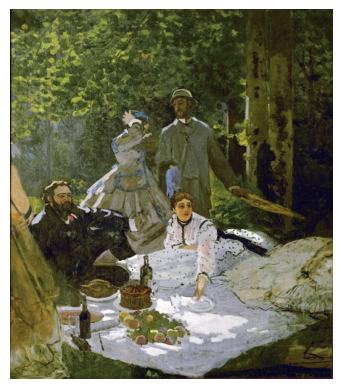

In [2]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
test_img = 'c:/art/impressionism/ip_217.jpg' # or 297 or 602
img = cv2.imread(test_img)

# Convert BGR image to RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(img_rgb)
plt.axis('off')  
plt.show()

- Above is the test Image

In [3]:
from colorthief import ColorThief

# Lists to store the dominant color and color palette for images
dominant_color_list = []
color_palette_list = []

# Path to the image from which we want to extract colors
image_path = 'c:/art/impressionism/ip_3562.jpg'

# Create a ColorThief object with the provided image path
color_thief = ColorThief(image_path)

# Get the dominant color from the image using the get_color() method
dominant_color = color_thief.get_color()
# Appending to the dominant_color_list (even though it's used for a single image here)
dominant_color_list.append(dominant_color)

# Get a color palette (list of colors) from the image using the get_palette() method
# color_count=6 : extracting 6 colors 
color_palette = color_thief.get_palette(color_count=6)
# Appending to the color_palette_list (even though it's used for a single image here)
color_palette_list.append(color_palette)

# Print the extracted dominant color and color palette
print('dominant_color : ', dominant_color)
print('color_palette : ', color_palette)

dominant_color :  (84, 49, 33)
color_palette :  [(81, 45, 28), (200, 179, 183), (166, 150, 163), (150, 96, 67), (123, 106, 95), (172, 151, 117)]


In [4]:
import webcolors

# Function to calculate the Euclidean distance between two RGB colors
def rgb_distance(rgb1, rgb2): 
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    return ((r2 - r1) ** 2 + (g2 - g1) ** 2 + (b2 - b1) ** 2) ** 0.5

# Function to find the closest matching color name for a given RGB color from a list of color names
def find_closest_color(rgb_color, color_list):
    # Initialize variables to store the closest color details
    closest_color = None
    min_distance = float('inf') # Start with infinite distance for comparison
    closest_color_index = None

    # Loop through each color name in the list
    for i, color_name in enumerate(color_list):
        # Calculate the distance between the given RGB color and the current color in the loop
        distance = rgb_distance(rgb_color, webcolors.name_to_rgb(color_name))
        # If this color is closer than previous closest colors, update the closest color details
        if distance < min_distance: 
            min_distance = distance
            closest_color = color_name
            closest_color_index = i

    # Return the name and index of the closest color
    return closest_color, closest_color_index

# RGB value of the dominant color in the image (placeholder, to be defined elsewhere in the code)
rgb_color = dominant_color

# List of color names to compare against
color_names = ['orangered', 'bisque', 'sandybrown', 'linen', 'antiquewhite', 'lavender', 'darkslateblue', 
               'lightsteelblue', 'steelblue', 'midnightblue', 'cadetblue', 'wheat', 'goldenrod', 'palegoldenrod', 
               'beige', 'khaki', 'rosybrown', 'indianred', 'maroon', 'darkolivegreen', 'darkkhaki', 'darkseagreen', 
               'olivedrab', 'tan', 'sienna', 'peru', 'saddlebrown', 'burlywood', 'darkslategray', 'thistle', 'dimgray', 
               'silver', 'gray', 'darkgray', 'lightgray', 'gainsboro', 'lightslategray', 'slategray', 'whitesmoke', 'palevioletred', 'black']

# Find the closest color name and its index in the color_names list for the dominant color
closest_color, closest_color_index = find_closest_color(rgb_color, color_names)

# Print the details of the closest color
print("Closest Color Name:", closest_color)
print("Closest Color Index:", closest_color_index)

Closest Color Name: darkolivegreen
Closest Color Index: 19


<br>

- The code below is an alternate version of the one above 

In [14]:
import pandas as pd
import webcolors
from tqdm import tqdm
import os

# Define a function that finds the closest color name for a given RGB tuple.
def closest_color(rgb):
    # Initializing a dictionary to store the distance between the provided RGB and all CSS3 colors.
    differences = {}

    # Iterating through all CSS3 colors.
    for color_hex, color_name in webcolors.CSS3_HEX_TO_NAMES.items():
        # Convert the HEX code to RGB values.
        r, g, b = webcolors.hex_to_rgb(color_hex)
        
        # Calculate the squared Euclidean distance between the provided RGB and the current color's RGB.
        differences[sum([(r - rgb[0]) ** 2, 
                         (g - rgb[1]) ** 2,
                         (b - rgb[2]) ** 2])] = color_name

    # Return the color name with the smallest Euclidean distance.
    return differences[min(differences.keys())] 

# Try to get the color name directly using the provided RGB value.
try:
    closest_color = webcolors.rgb_to_name(dominant_color)
# If the RGB does not match any CSS3 color exactly, find the closest match.
except ValueError:
    closest_color = closest_color(dominant_color)

# Print the name of the closest color.
print("Closest Color Name:", closest_color)

Closest Color Name: darkolivegreen


In [6]:
import pandas as pd

top_15_rows = pd.read_csv('c:/data/ip_top_15_rows.csv')
selected_rows = top_15_rows[top_15_rows['closest_color'] == closest_color]

group = selected_rows.iloc[0]['final_group']
print(group)

Green_1


In [9]:
import pandas as pd
import random

top_15_rows = pd.read_csv('c:/data/ip_top_15_rows.csv')
selected_rows = top_15_rows[top_15_rows['final_group'] == group]

random_sample = selected_rows.sample(n=9)
file_names = random_sample['file_name'].tolist()
print(file_names)

['ip_1771', 'ip_3530', 'ip_2326', 'ip_390', 'ip_1029', 'ip_1460', 'ip_1031', 'ip_3292', 'ip_1668']


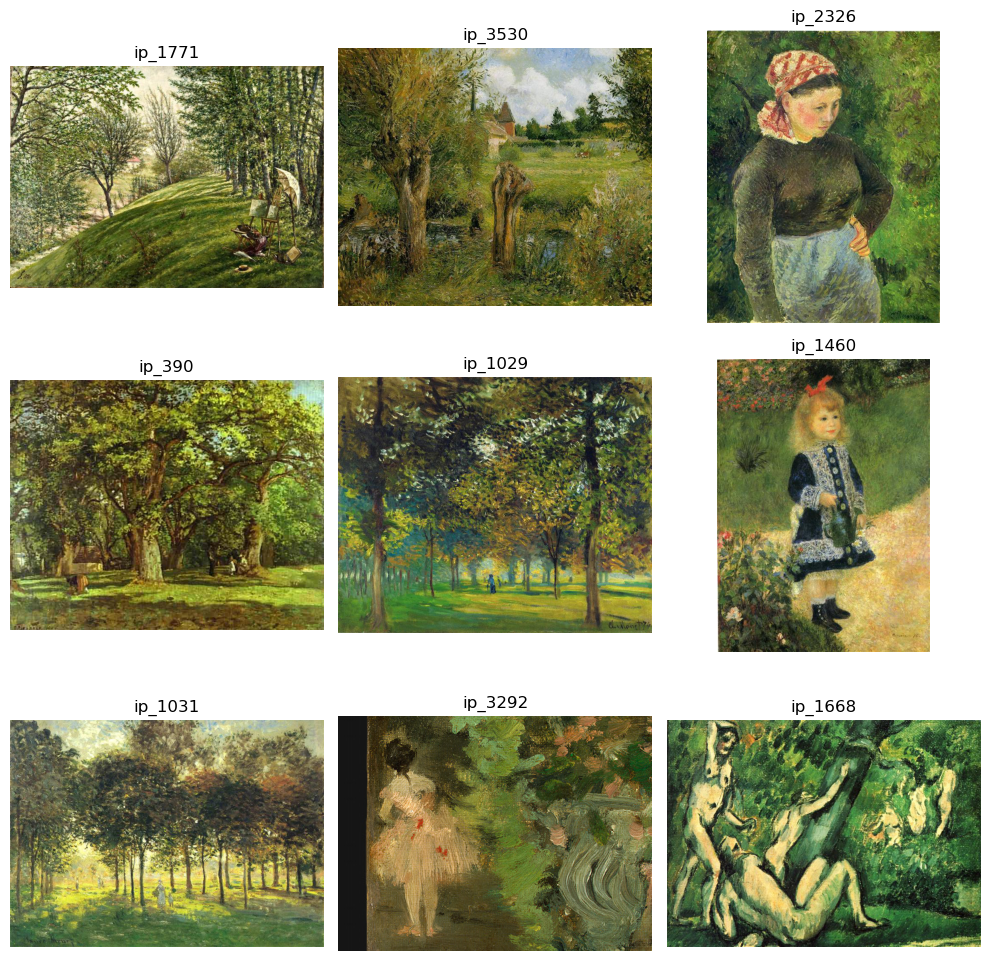

In [10]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define folder path where the images are stored
folder_path = 'c:/art/impressionism/'

# Function to generate the complete path for a given style and number
def get_style_filename(prefix, number):
    # Concatenate prefix and number to form the filename
    filename = f'{prefix}{number}.jpg'
    # Join the folder path and filename to get the full path
    file_path = os.path.join(folder_path, filename)
    return file_path

# List of file names without extensions, e.g. ['ip_1230', 'ip_1031', ...]
numbers = file_names 

# Initialize a 3x3 plot grid of size 10x10 inches
plt.figure(figsize=(10, 10))

# Loop through each filename to display its image
for i, num in enumerate(numbers):
    if num.startswith('ip_'):
        # Extract the numeric part from filenames like ip_123
        number = num[3:]  # slicing to get 123 from ip_123
        # Get the full path of the image using the extracted number
        file_path = get_style_filename('ip_', number) 
        # Load the image using its path
        image = imread(file_path) 

        # Plot the image in the appropriate subplot position
        plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        # Hide axis values
        plt.axis('off')
        # Set the title of the subplot to the filename
        plt.title(num)

# Adjust the spacing between plots
plt.tight_layout()
# Display the plotted images
plt.show()

<br>

- The code below is an alternate version of the one above
- The code below is used when dealing with multiple styles, as opposed to a single style

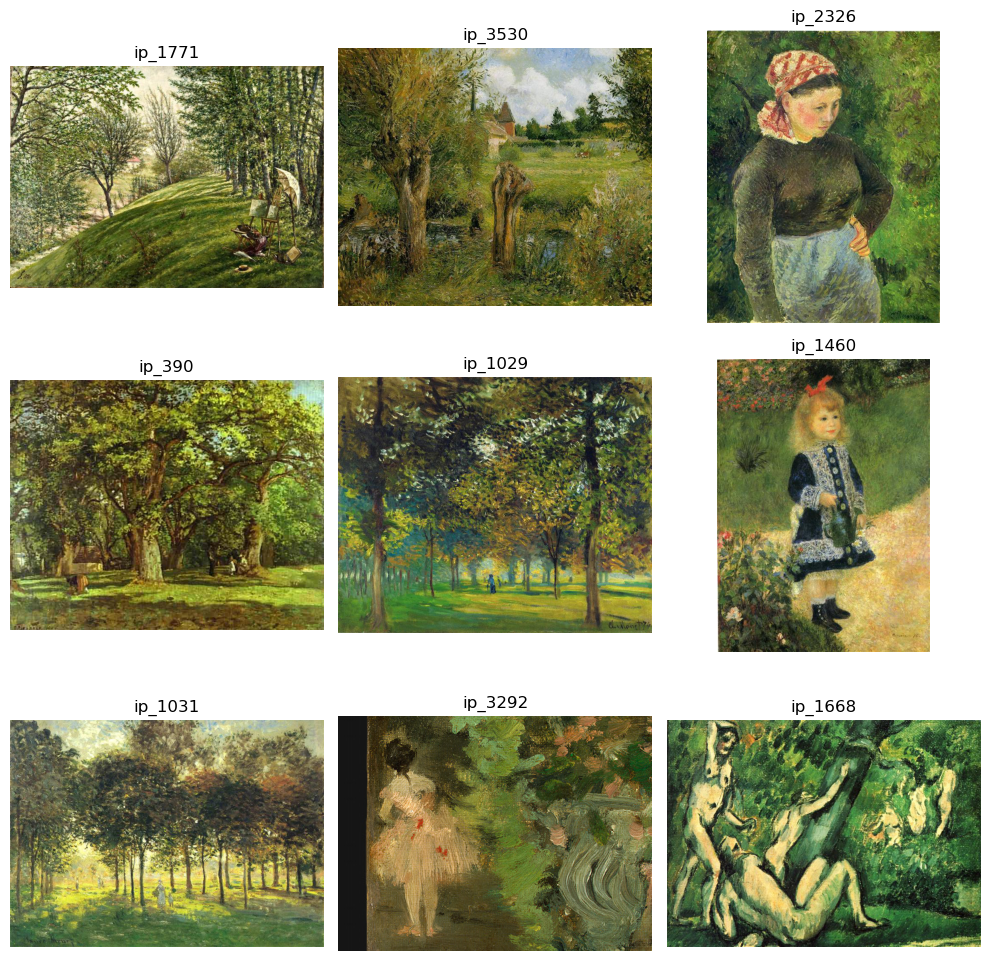

In [11]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# List of folder paths corresponding to different art styles
folder_paths = ['c:/art/impressionism']

# List of file prefixes that correspond to the folder_paths
files = ['ip_']

# Function to generate the complete path for a given prefix and number
def get_style_filename(prefix, number):
    # Find the index of the prefix in the files list
    idx = files.index(prefix)
    # Retrieve the corresponding folder path
    folder_path = folder_paths[idx]
    # Concatenate prefix and number to form the filename
    filename = f'{prefix}{number}.jpg'
    # Join the folder path and filename to get the full path
    file_path = os.path.join(folder_path, filename)
    return file_path

# List of file names without extensions, e.g. ['ip_1230', ...]
numbers = file_names

# Initialize a 3x3 plot grid of size 10x10 inches
plt.figure(figsize=(10, 10))

# Loop through each filename to display its image
for i, num in enumerate(numbers):
    for prefix in files:
        if num.startswith(prefix):
            # Extract the numeric part from the filename
            number = num[len(prefix):]
            # Get the full path of the image using the prefix and extracted number
            file_path = get_style_filename(prefix, number)
            # Load the image using its path
            image = imread(file_path)

            # Plot the image in the appropriate subplot position
            plt.subplot(3, 3, i + 1)
            plt.imshow(image)
            # Hide axis values
            plt.axis('off')
            # Set the title of the subplot to the filename
            plt.title(num)

# Adjust the spacing between plots
plt.tight_layout()
# Display the plotted images
plt.show()